In [1]:
import numpy as np
import uproot
import pandas as pd
import ROOT
import matplotlib.pyplot as plt

%config Completer.use_jedi = False

Welcome to JupyROOT 6.22/06


In [2]:
variables = ['PtLep0', 'PtLep1', 'HT', 'weight']
#variables = ['Mttbar', 'PTttbar', 'Phi', 'NNLOweight', 'weight']
#variables = ['t_pt', 'tbar_pt', 'NNLOweight', 'weight']

In [3]:
#data_nom = uproot.open('input_root/ttbar_truth_nominal.root')['truth_ll'].arrays(variables, library="pd")
#data_nom = uproot.open('input_root/matched_ee_AF.root')['matched'].arrays(variables, library="pd")
data_nom_v1_beforeReco = uproot.open('input_root/test_v1_v2/v1/beforeReco/ttbar_PowPy8_atlfast/mc16a/ttbar.root')['em'].arrays(variables, library="pd")
data_nom_v1_afterReco = uproot.open('input_root/test_v1_v2/v1/afterReco/ttbar_PowPy8_atlfast/mc16a/ttbar.root')['em'].arrays(variables, library="pd")

data_nom_v2_beforeReco = uproot.open('input_root/test_v1_v2/v2/beforeReco/ttbar_PowPy8_atlfast/mc16a/ttbar.root')['em'].arrays(variables, library="pd")
data_nom_v2_afterReco = uproot.open('input_root/test_v1_v2/v2/afterReco/ttbar_PowPy8_atlfast/mc16a/ttbar.root')['em'].arrays(variables, library="pd")

In [4]:
#data_MCNLO = uproot.open('input_root/ttbar_truth_MCNLO.root')['truth_ll'].arrays(variables, library="pd")
#data_MCNLO = uproot.open('input_root/matched_ee_MCNLO.root')['matched'].arrays(variables, library="pd")
data_MCNLO_v1_beforeReco = uproot.open('input_root/test_v1_v2/v1/beforeReco/ttbar_MCNLO/mc16a/ttbar.root')['em'].arrays(variables, library="pd")
data_MCNLO_v1_afterReco = uproot.open('input_root/test_v1_v2/v1/afterReco/ttbar_MCNLO/mc16a/ttbar.root')['em'].arrays(variables, library="pd")

data_MCNLO_v2_beforeReco = uproot.open('input_root/test_v1_v2/v2/beforeReco/ttbar_MCNLO/mc16a/ttbar.root')['em'].arrays(variables, library="pd")
data_MCNLO_v2_afterReco = uproot.open('input_root/test_v1_v2/v2/afterReco/ttbar_MCNLO/mc16a/ttbar.root')['em'].arrays(variables, library="pd")

In [5]:
#data_PowH7 = uproot.open('input_root/ttbar_truth_PowH7.root')['truth_ll'].arrays(variables, library="pd")
#data_PowH7 = uproot.open('input_root/matched_ee_PowH7.root')['matched'].arrays(variables, library="pd")
data_PowH7_v1_beforeReco = uproot.open('input_root/test_v1_v2/v1/beforeReco/ttbar_PowH7/mc16a/ttbar.root')['em'].arrays(variables, library="pd")
data_PowH7_v1_afterReco = uproot.open('input_root/test_v1_v2/v1/afterReco/ttbar_PowH7/mc16a/ttbar.root')['em'].arrays(variables, library="pd")

data_PowH7_v2_beforeReco = uproot.open('input_root/test_v1_v2/v2/beforeReco/ttbar_PowH7/mc16a/ttbar.root')['em'].arrays(variables, library="pd")
data_PowH7_v2_afterReco = uproot.open('input_root/test_v1_v2/v2/afterReco/ttbar_PowH7/mc16a/ttbar.root')['em'].arrays(variables, library="pd")

In [2]:
data_nom = uproot.open('/home/theo/Téléchargements/ttbar.root')['em'].arrays(['Mttbar', 'PTttbar', 'CorrKK',
                                                                              'PTtop', 'weight'],
                                                                             library="pd")

data_MCNLO = uproot.open('/home/theo/Téléchargements/ttbar_MCNLO.root')['em'].arrays(['Mttbar', 'PTttbar', 'CorrKK',
                                                                                      'PTtop', 'weight'],
                                                                                     library="pd")

data_PowH7 = uproot.open('/home/theo/Téléchargements/ttbar_PowH7.root')['em'].arrays(['Mttbar', 'PTttbar', 'CorrKK',
                                                                                      'PTtop', 'weight'],
                                                                                     library="pd")

data_hdamp = uproot.open('/home/theo/Téléchargements/ttbar_hdamp.root')['em'].arrays(['Mttbar', 'PTttbar', 'CorrKK',
                                                                                      'PTtop', 'weight'],
                                                                                     library="pd")

data_fastsim = uproot.open('/home/theo/Téléchargements/ttbar_fastsim.root')['em'].arrays(['Mttbar', 'PTttbar', 'CorrKK',
                                                                                      'PTtop', 'weight'],
                                                                                     library="pd")

df_syst_list = [data_MCNLO, data_PowH7, data_hdamp, data_fastsim]
syst_label_list = ['MCNLO', 'PowH7', 'hdamp', 'fastsim']
syst_color_list = ['red', 'green', 'darkorange', 'blue']

FileNotFoundError: file not found

    '/home/theo/Téléchargements/ttbar.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [15]:
def plotVariations(df_nom, df_syst, syst_label, syst_color, var, var_label, xmin, xmax, nbin, NNLOreweight=False):

    bins = np.linspace(xmin, xmax, nbin+1)
    width = (np.max(bins)-np.min(bins)) / (len(bins)-1)
        
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':[3,1]}, figsize=(10,8))

    if NNLOreweight:
        h_nom = ax1.hist(df_nom[var], weights=df_nom['weight']*df_nom['NNLOweight'], label='nominal',
                         bins=bins, histtype='step', color='black', linewidth=3)
    else:
        h_nom = ax1.hist(df_nom[var], weights=df_nom['weight'], label='nominal',
                         bins=bins, histtype='step', color='black', linewidth=3)
    
    for i in range(len(df_syst)):
        if NNLOreweight:
            h_syst = ax1.hist(df_syst[i][var], weights=df_syst[i]['weight']*df_syst[i]['NNLOweight'],
                              label=syst_label[i], bins=bins, histtype='step', color=syst_color[i], linewidth=3)
        else:
            h_syst = ax1.hist(df_syst[i][var], weights=df_syst[i]['weight'], label=syst_label[i],
                               bins=bins, histtype='step', color=syst_color[i], linewidth=3)
        ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
                     color=syst_color[i], linestyle='None')
        
    ax1.set_ylabel('$N_{event}$')
    ax1.legend()
    ax1.set_yscale('log')

    ax2.axhline(y=0, xmin=0, xmax=1, color='black')
    ax2.set_xlabel(var_label)
    ax2.set_ylabel('$\\frac{Syst.-Nom.}{Nom.}$')
    ax2.set_ylim(-0.4, 0.4)

    plt.tight_layout()

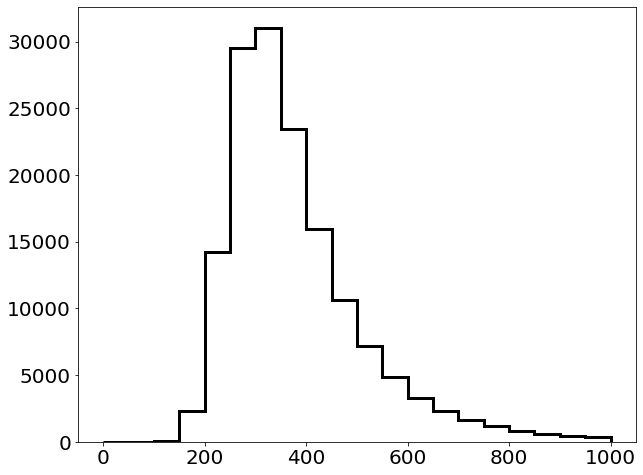

In [24]:
plt.figure(figsize=(10,8))
bins = np.linspace(0, 1000, 20+1)

h_nom = plt.hist(data_nom_v2_beforeReco['HT'], weights=data_nom_v2_beforeReco['weight'], label='nominal',
                 bins=bins, histtype='step', color='black', linewidth=3)


In [23]:
h_nom

(array([    0.        ,     0.        ,    39.95090318,  2290.88777054,
        14219.86806517, 29511.18157348, 31043.98163799, 23409.13153281,
        15960.3128507 , 10640.86987543,  7143.21612695,  4828.64099206,
         3299.18647429,  2297.67067705,  1604.42901745,  1150.05367143,
          841.08718838,   608.9021026 ,   450.82111495,   333.34025069]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 [<matplotlib.patches.Polygon at 0x7f7661da87c0>])

In [26]:
np.sum(h_nom[0])

149673.5318251681

<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,


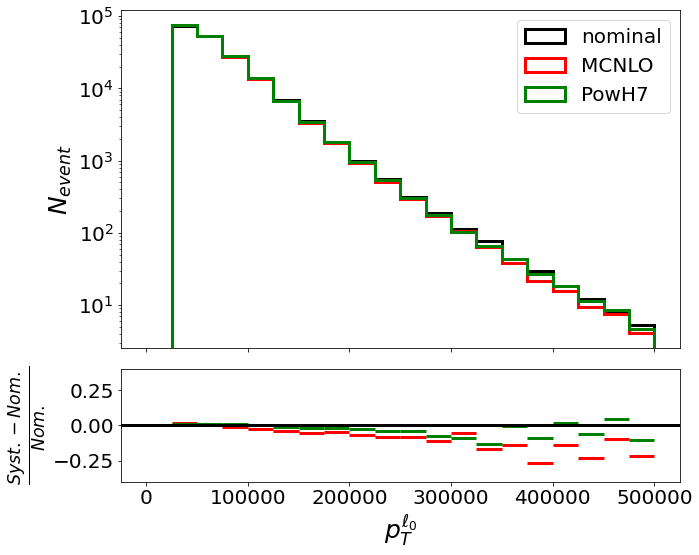

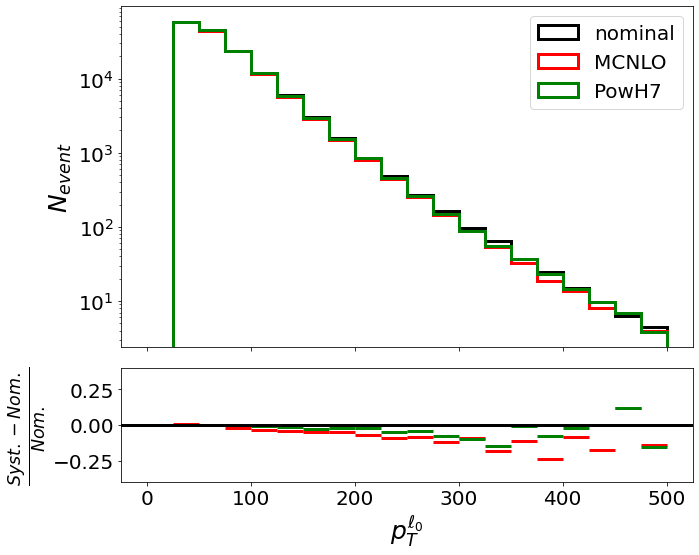

In [16]:
plotVariations(data_nom_v1_beforeReco, [data_MCNLO_v1_beforeReco, data_PowH7_v1_beforeReco], ['MCNLO', 'PowH7'], ['red', 'green'],
               'PtLep0', '$p_T^{\\ell_0}$', 0, 500000, 20)
plotVariations(data_nom_v2_beforeReco, [data_MCNLO_v2_beforeReco, data_PowH7_v2_beforeReco], ['MCNLO', 'PowH7'], ['red', 'green'],
               'PtLep0', '$p_T^{\\ell_0}$', 0, 500, 20)

<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,


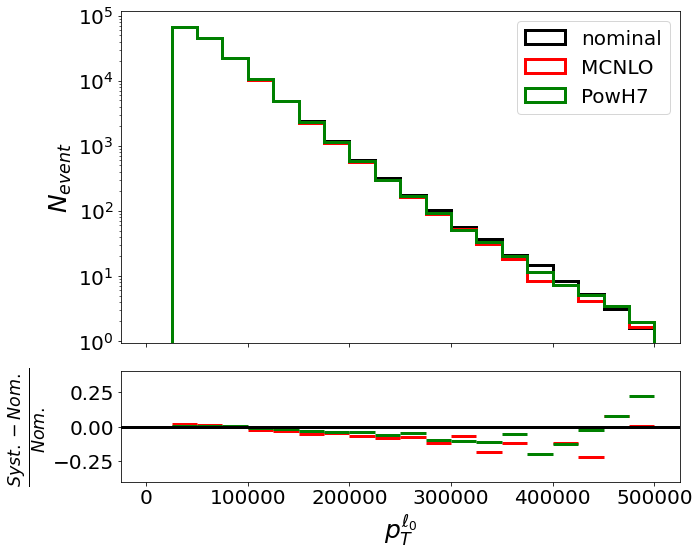

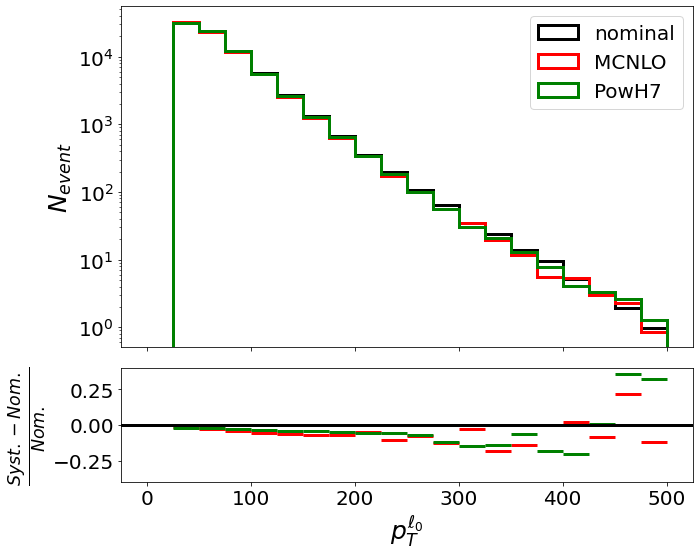

In [17]:
plotVariations(data_nom_v1_afterReco, [data_MCNLO_v1_afterReco, data_PowH7_v1_afterReco], ['MCNLO', 'PowH7'], ['red', 'green'],
               'PtLep0', '$p_T^{\\ell_0}$', 0, 500000, 20)
plotVariations(data_nom_v2_afterReco, [data_MCNLO_v2_afterReco, data_PowH7_v2_afterReco], ['MCNLO', 'PowH7'], ['red', 'green'],
               'PtLep0', '$p_T^{\\ell_0}$', 0, 500, 20)

<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,


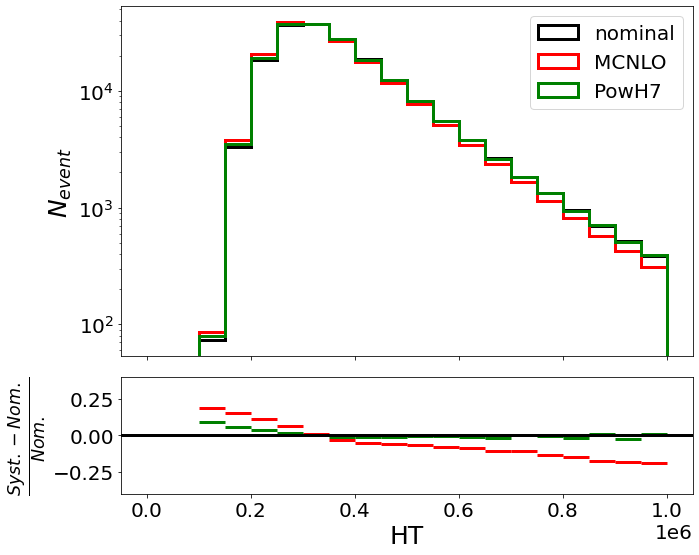

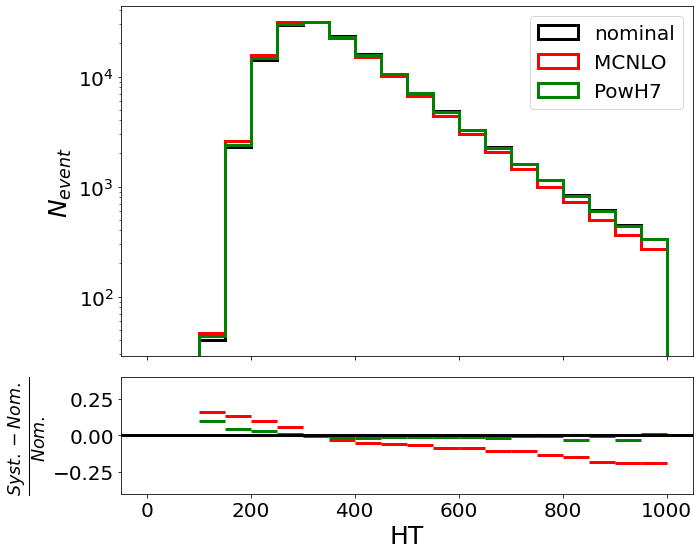

In [18]:
plotVariations(data_nom_v1_beforeReco, [data_MCNLO_v1_beforeReco, data_PowH7_v1_beforeReco], ['MCNLO', 'PowH7'], ['red', 'green'],
               'HT', 'HT', 0, 1000000, 20)
plotVariations(data_nom_v2_beforeReco, [data_MCNLO_v2_beforeReco, data_PowH7_v2_beforeReco], ['MCNLO', 'PowH7'], ['red', 'green'],
               'HT', 'HT', 0, 1000, 20)

<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,
<ipython-input-15-56408e20b048>:22: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], xerr=width/2,


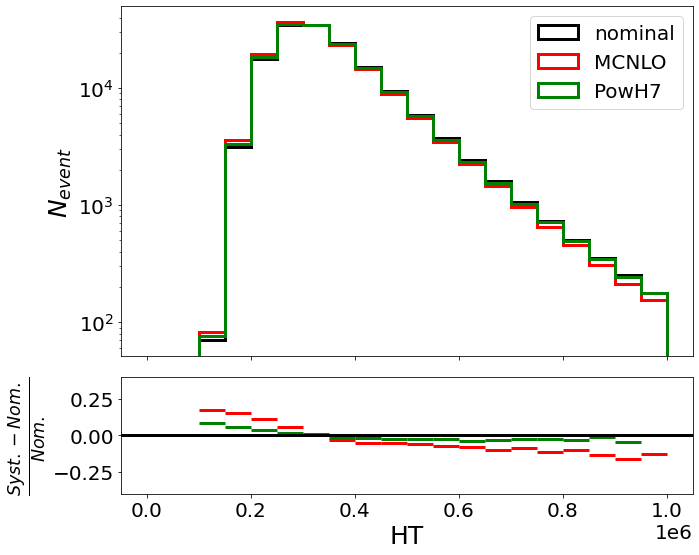

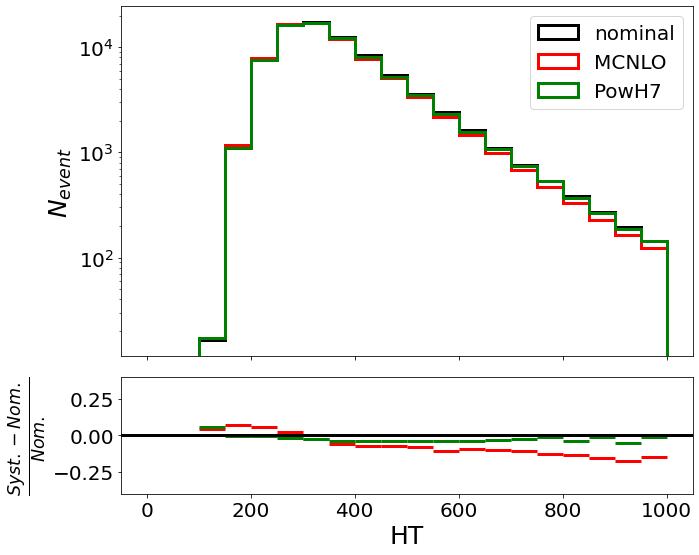

In [19]:
plotVariations(data_nom_v1_afterReco, [data_MCNLO_v1_afterReco, data_PowH7_v1_afterReco], ['MCNLO', 'PowH7'], ['red', 'green'],
               'HT', 'HT', 0, 1000000, 20)
plotVariations(data_nom_v2_afterReco, [data_MCNLO_v2_afterReco, data_PowH7_v2_afterReco], ['MCNLO', 'PowH7'], ['red', 'green'],
               'HT', 'HT', 0, 1000, 20)

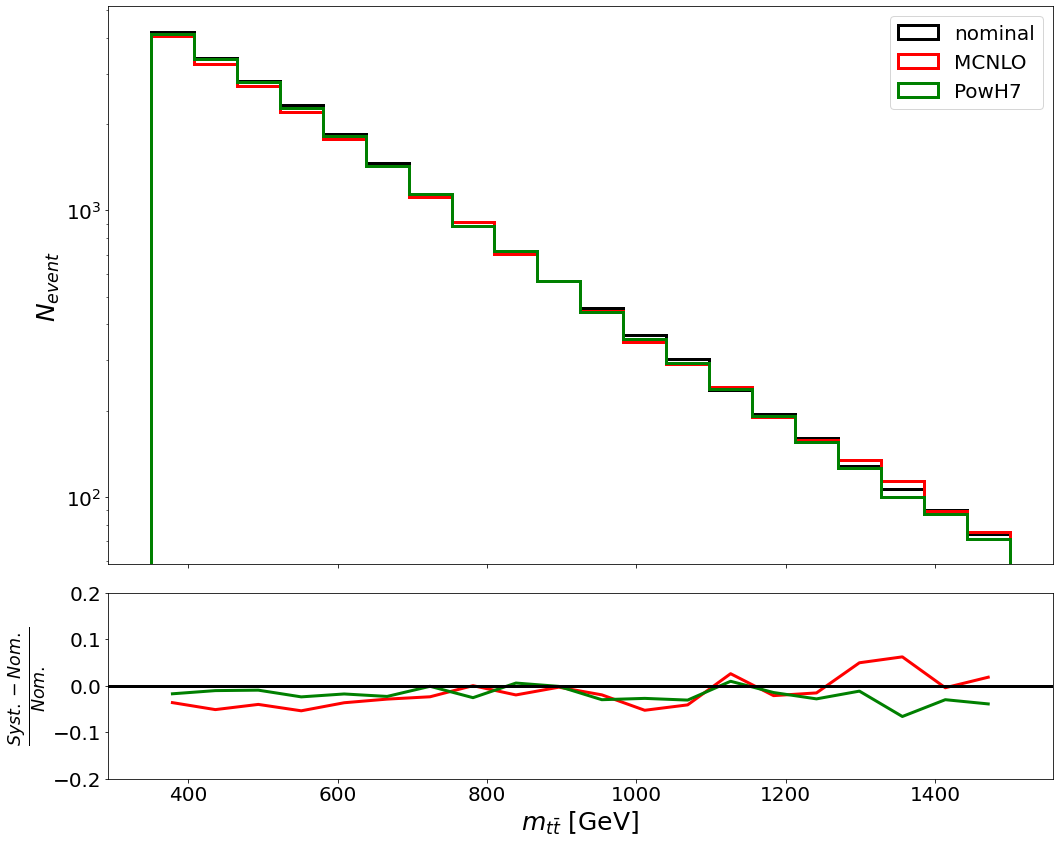

In [21]:
plotVariations(data_nom, [data_MCNLO, data_PowH7], ['MCNLO', 'PowH7'], ['red', 'green'],
               'Mttbar', '$m_{t\\bar{t}}$ [GeV]', 350, 1500, 20)

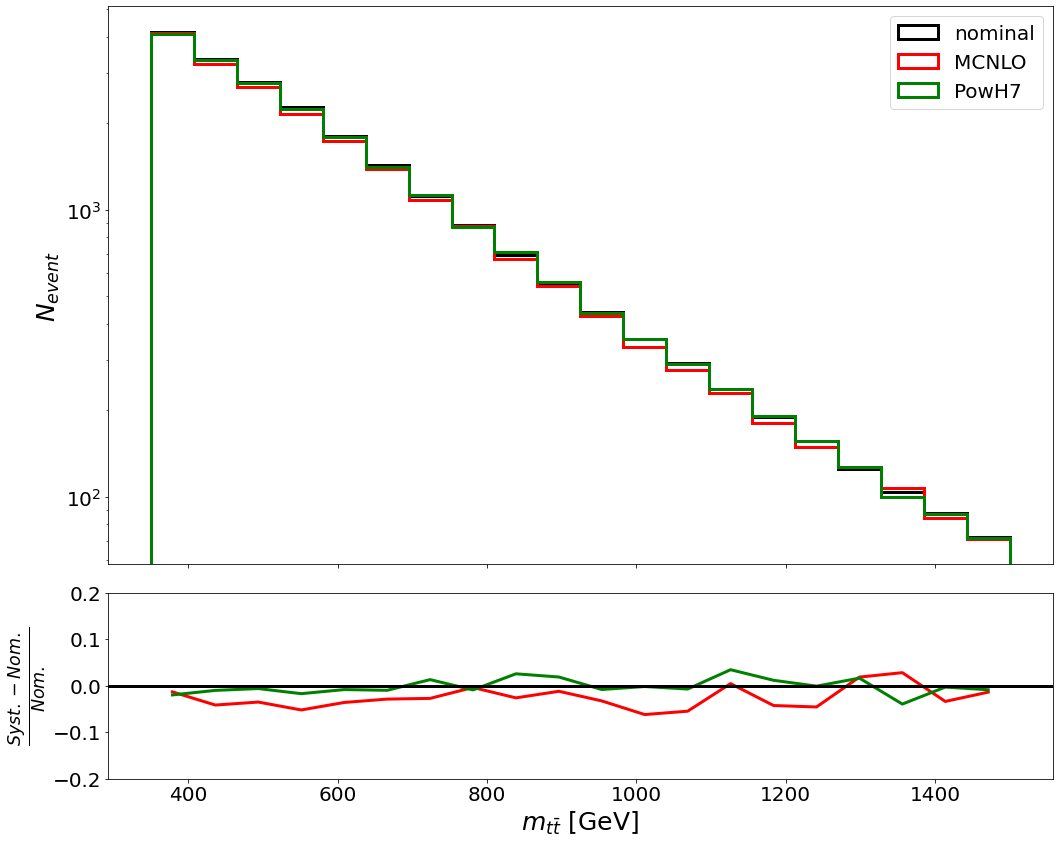

In [22]:
plotVariations(data_nom, [data_MCNLO, data_PowH7], ['MCNLO', 'PowH7'], ['red', 'green'],
               'Mttbar', '$m_{t\\bar{t}}$ [GeV]', 350, 1500, 20, NNLOreweight=True)

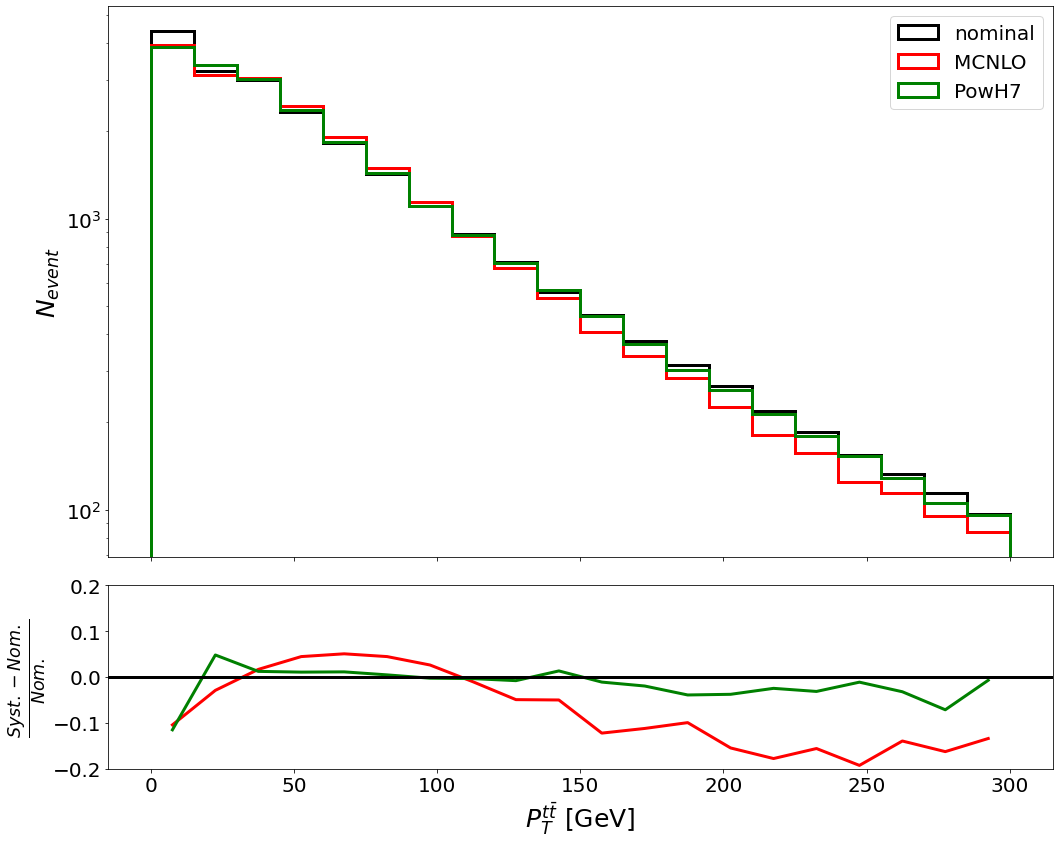

In [23]:
plotVariations(data_nom, [data_MCNLO, data_PowH7], ['MCNLO', 'PowH7'], ['red', 'green'],
               'PTttbar', '$P_T^{t\\bar{t}}$ [GeV]', 0, 300, 20)

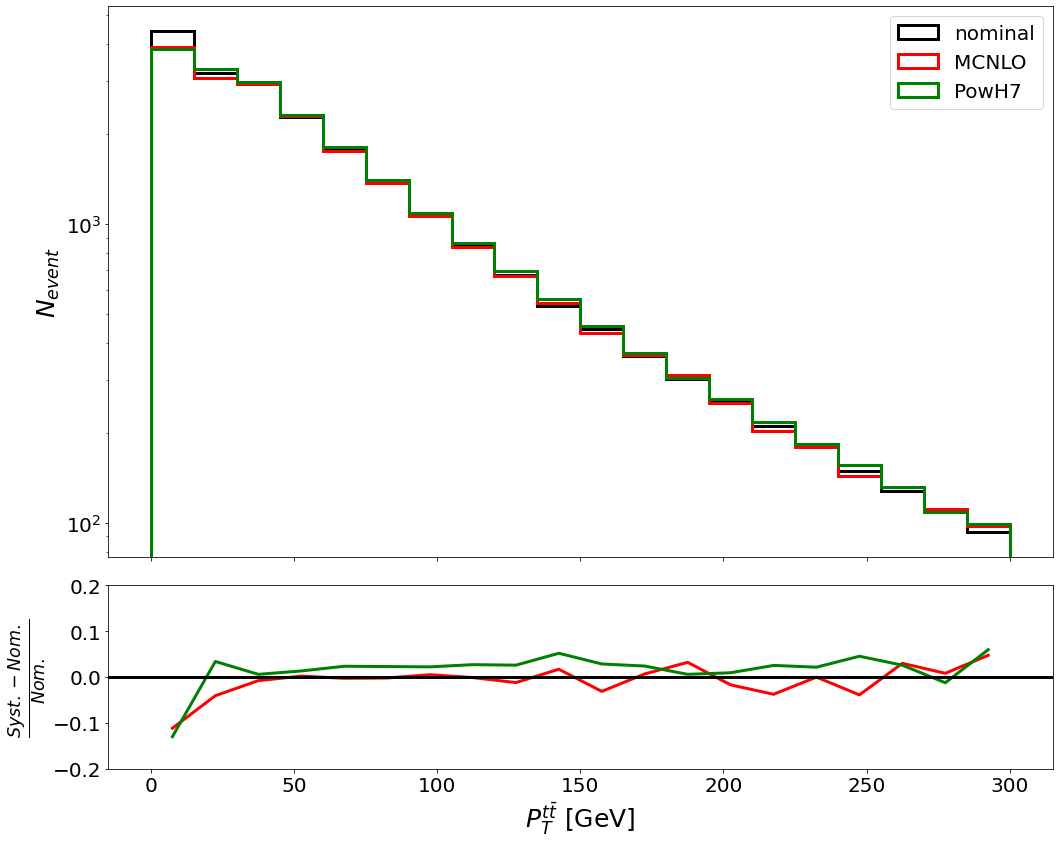

In [24]:
plotVariations(data_nom, [data_MCNLO, data_PowH7], ['MCNLO', 'PowH7'], ['red', 'green'],
               'PTttbar', '$P_T^{t\\bar{t}}$ [GeV]', 0, 300, 20, NNLOreweight=True)

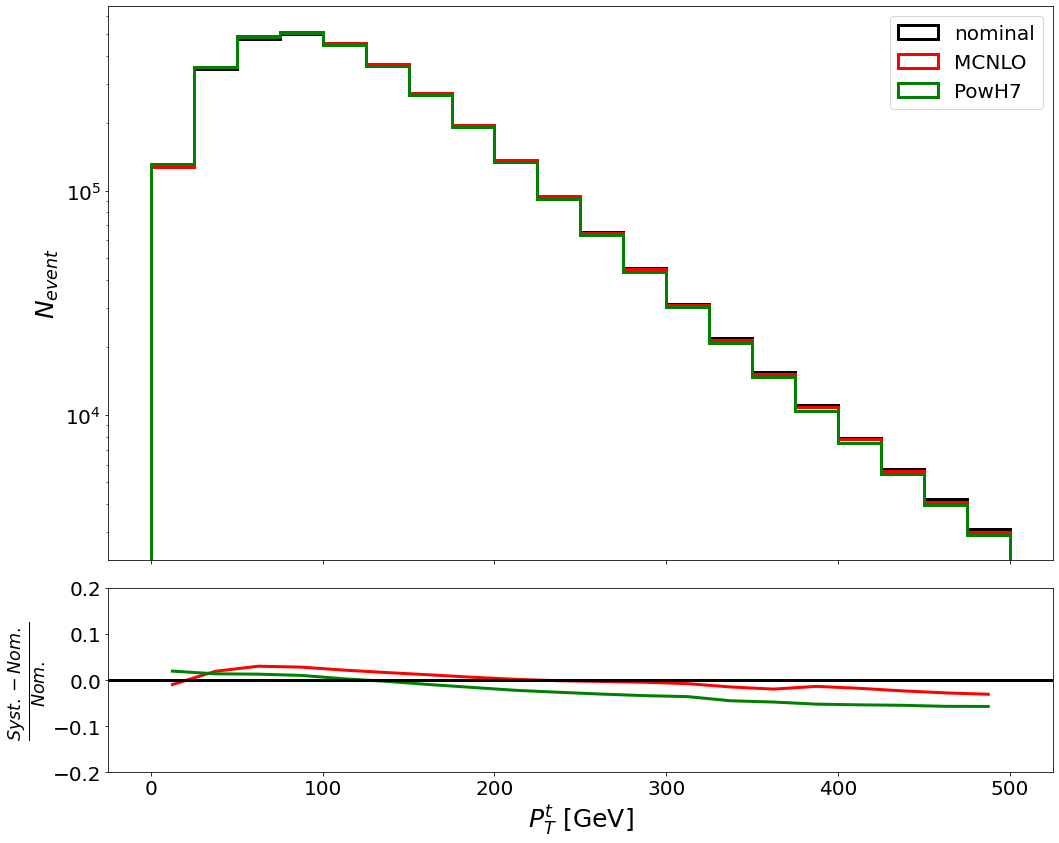

In [8]:
plotVariations(data_nom, [data_MCNLO, data_PowH7], ['MCNLO', 'PowH7'], ['red', 'green'],
               't_pt', '$P_T^{t}$ [GeV]', 0, 500, 20)

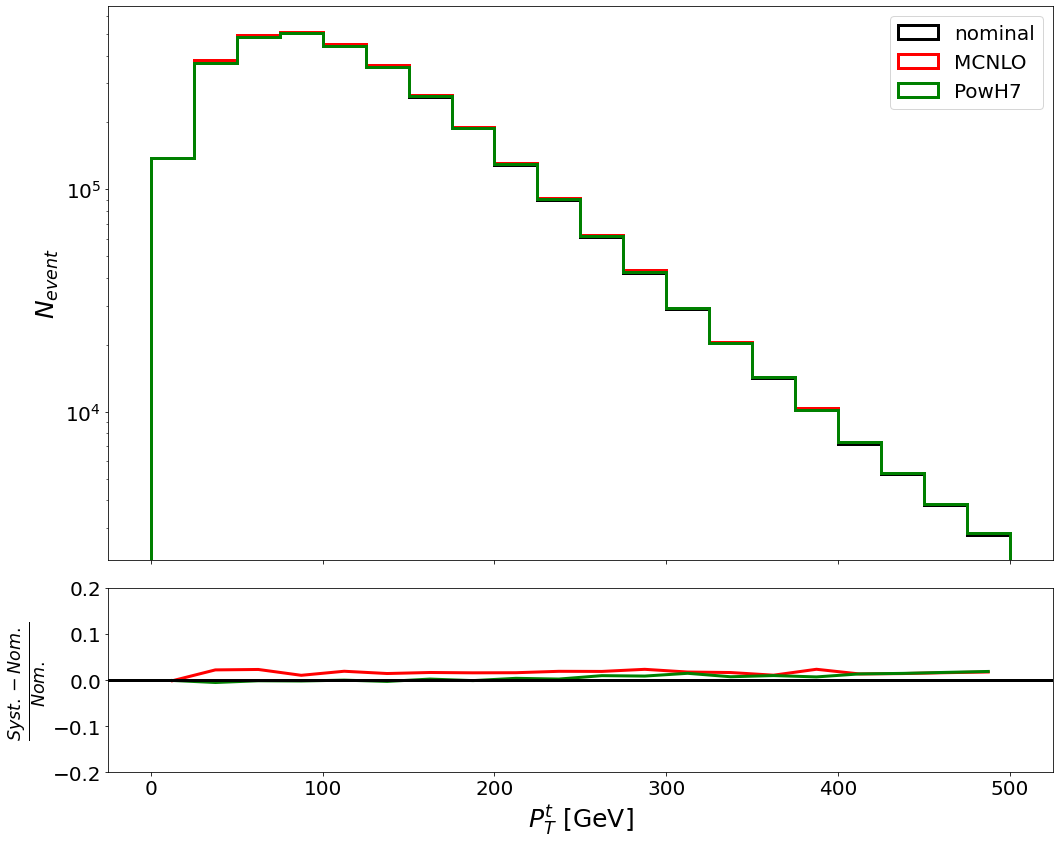

In [9]:
plotVariations(data_nom, [data_MCNLO, data_PowH7], ['MCNLO', 'PowH7'], ['red', 'green'],
               't_pt', '$P_T^{t}$ [GeV]', 0, 500, 20, NNLOreweight=True)

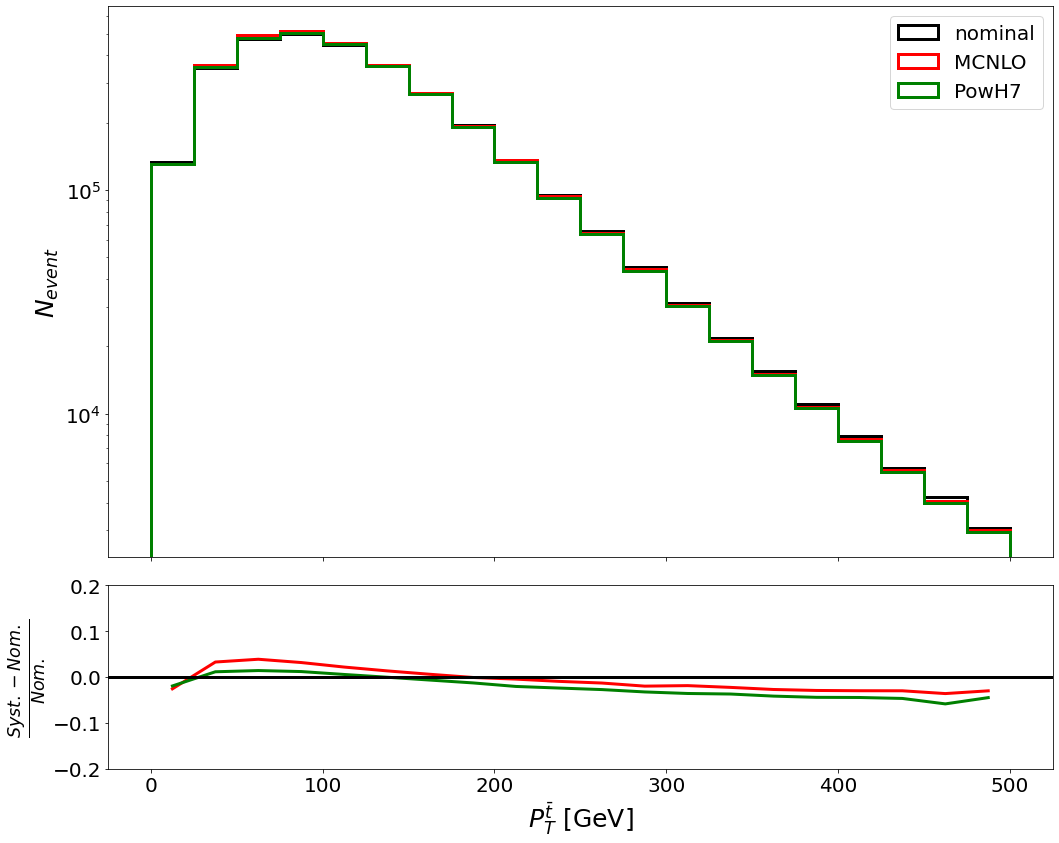

In [10]:
plotVariations(data_nom, [data_MCNLO, data_PowH7], ['MCNLO', 'PowH7'], ['red', 'green'],
               'tbar_pt', '$P_T^{\\bar{t}}$ [GeV]', 0, 500, 20)

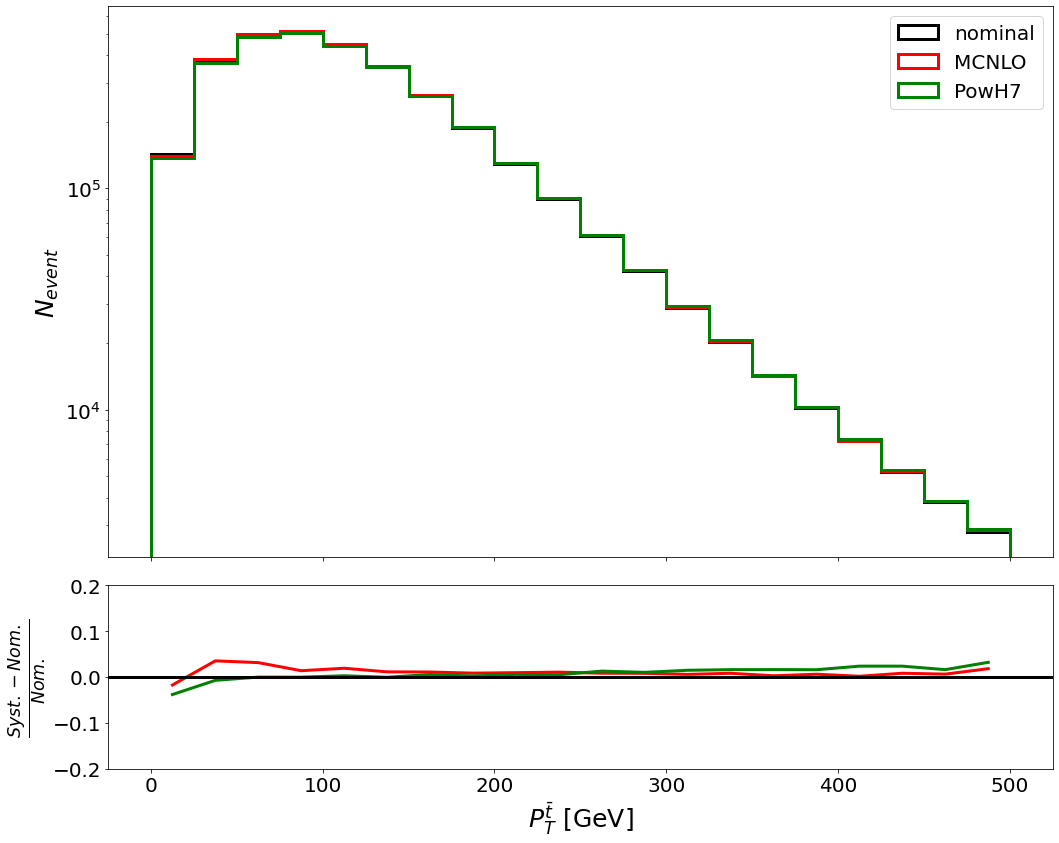

In [11]:
plotVariations(data_nom, [data_MCNLO, data_PowH7], ['MCNLO', 'PowH7'], ['red', 'green'],
               'tbar_pt', '$P_T^{\\bar{t}}$ [GeV]', 0, 500, 20, NNLOreweight=True)

<ipython-input-7-7b8e99f2ae0b>:14: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], color=syst_color[i])
<ipython-input-7-7b8e99f2ae0b>:14: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], color=syst_color[i])
<ipython-input-7-7b8e99f2ae0b>:14: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], color=syst_color[i])
<ipython-input-7-7b8e99f2ae0b>:14: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot((bins + width/2)[:-1], (h_syst[0]-h_nom[0]) / h_nom[0], color=syst_color[i])


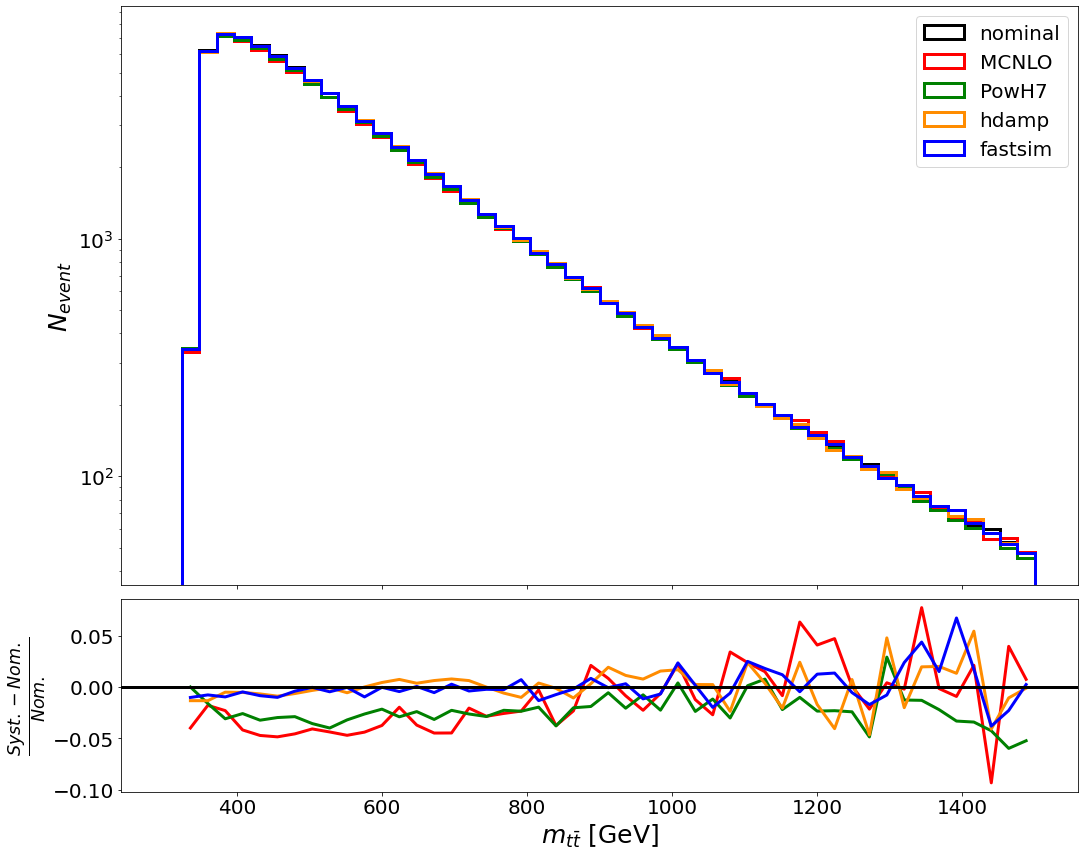

In [8]:
plotVariations(data_nom, df_syst_list, syst_label_list, syst_color_list,
               'Mttbar', '$m_{t\\bar{t}}$ [GeV]', 300, 1500, 50)

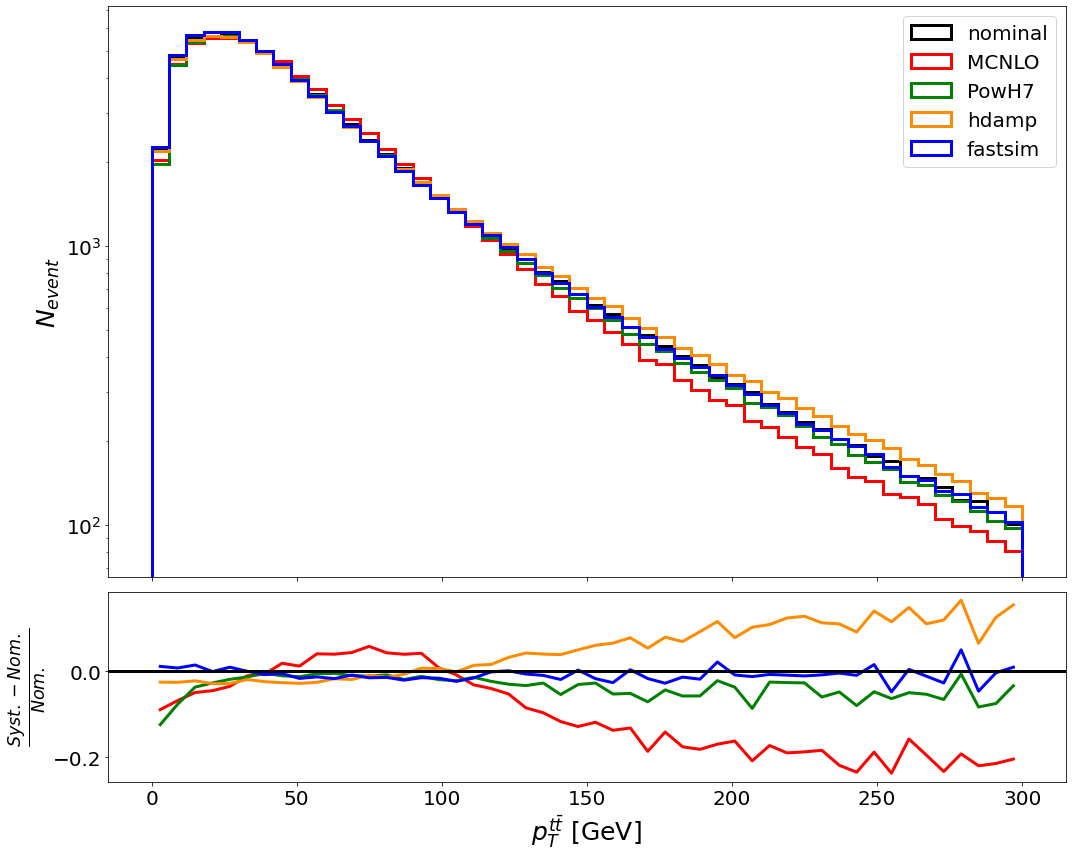

In [8]:
plotVariations(data_nom, df_syst_list, syst_label_list, syst_color_list,
               'PTttbar', '$p_T^{t\\bar{t}}$ [GeV]', 0, 300, 50)

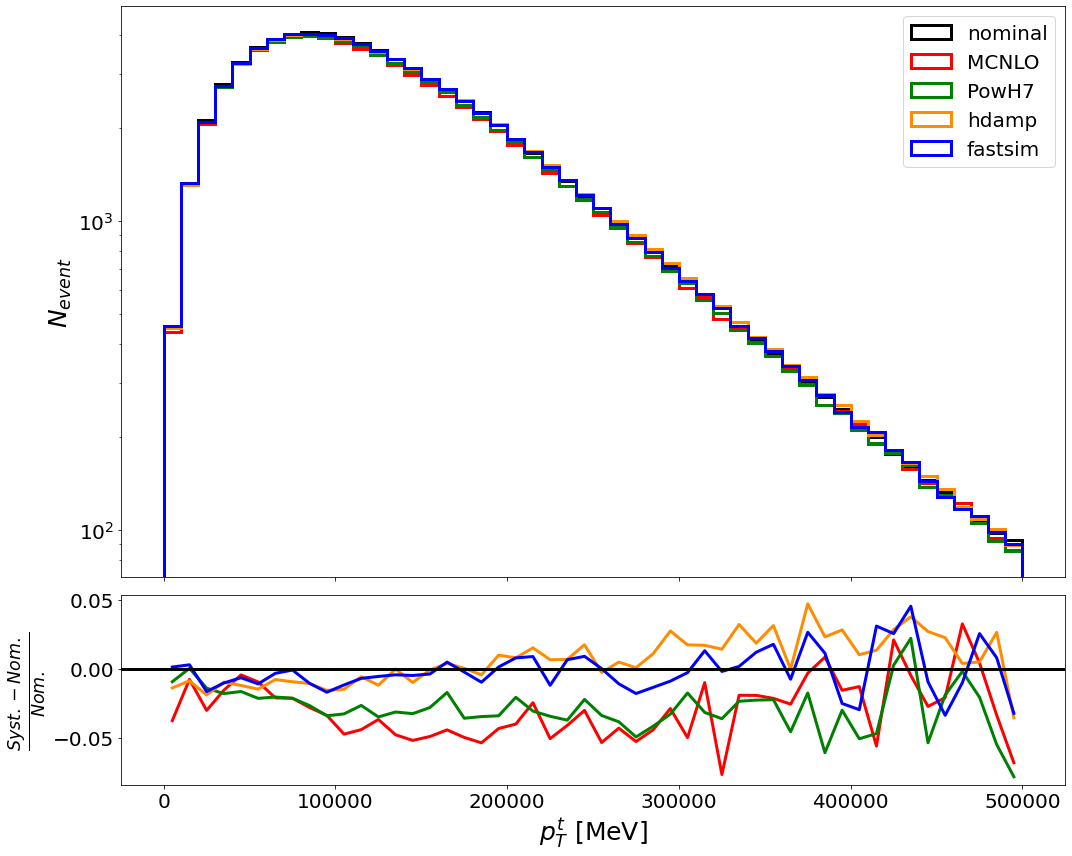

In [9]:
plotVariations(data_nom, df_syst_list, syst_label_list, syst_color_list,
               'PTtop', '$p_T^t$ [MeV]', 0, 500000, 50)

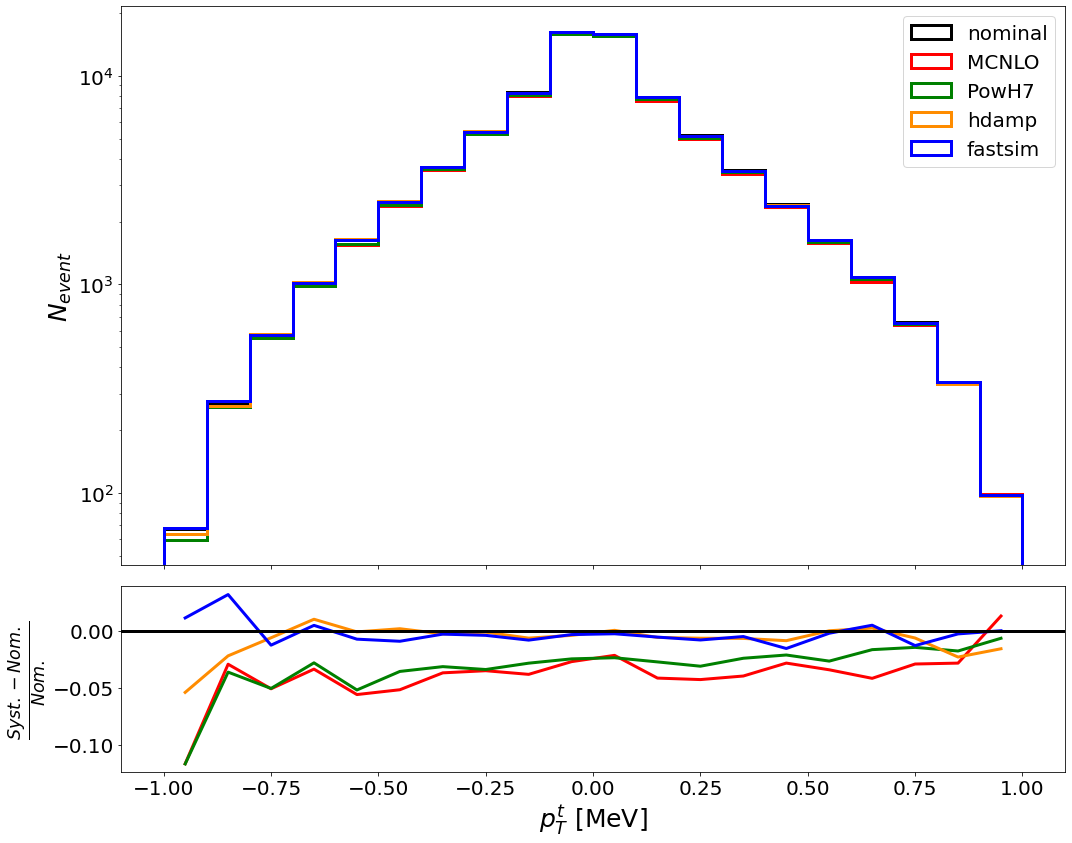

In [5]:
plotVariations(data_nom, df_syst_list, syst_label_list, syst_color_list,
               'CorrKK', '$p_T^t$ [MeV]', -1, 1, 20)